# 1. Pengambilan data dengan web scrapping


In [210]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.by import By
import numpy as np
import re

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

C:\Users\Fiqih\AppData\Local\Temp\ipykernel_5228\3588572262.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [211]:
# # Membuat object dengan webdriver untuk membuka web
# driver = webdriver.Edge()

In [212]:
# # Membuat list kosong untuk menampung data kolom
# nama_produk = []
# harga_produk = []
# nama_penjual = []
# kota_toko = []
# banyaknya_terjual = []
# rating_produk = []

# # Looping untuk membuka halaman page
# for page in range(60) :

#     # Membuat variable untuk mngarahkan ke website
#     url = f"https://www.tokopedia.com/search?navsource=&page={page}&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=1"

#     # Mengarahkan browser ke url
#     driver.get(url)

#     # Delay 5 detik untuk memberikan waktu UI loading
#     time.sleep(5)

#     # Memberikan frekuensi scroll 
#     for i in range(20) :
#         driver.execute_script("window.scrollBy(0,300)")
#         # Memberikan waktu jeda scroll
#         time.sleep(1)
    
#     # Membaca kode html
#     html = driver.page_source
#     soup = BeautifulSoup(html, "html.parser")

#     # Membuat container
#     container = soup.find_all("div", class_ = "css-jza1fo")

#     # Looping untuk membaca tiap elemen di container
#     for element in container :
        
#         # Ekstrak nama produk
#         produk = element.find("div", {"class" : "prd_link-product-name css-3um8ox"})
#         if produk is not None :
#             nama_produk.append(produk.get_text())
#         else :
#             nama_produk.append(None)

#         # Ekstrak harga produk
#         harga = element.find("div", {"class" : "prd_link-product-price css-h66vau"})
#         if harga is not None :
#             harga_produk.append(harga.get_text())
#         else :
#             harga_produk.append(None)

#         # Ekstrak nama penjual
#         penjual = element.find("span", attrs={"class" : "prd_link-shop-name css-1kdc32b flip"})
#         if penjual is not None :
#             nama_penjual.append(penjual.get_text())
#         else :
#             nama_penjual.append(None)

#         # Ekstrak lokasi
#         lokasi = element.find("span", {"class" : "prd_link-shop-loc css-1kdc32b flip"})
#         if lokasi is not None : 
#             kota_toko.append(lokasi.get_text())
#         else :
#             kota_toko.append(None)

#         # Ekstrak jumlah produk yang terjual
#         terjual = element.find("span", {"class" : "prd_label-integrity css-1sgek4h"})
#         if terjual is not None :
#             banyaknya_terjual.append(terjual.get_text())
#         else :
#             banyaknya_terjual.append(None)

#         # Ekstrak nilai rating produk
#         rating = element.find("span", {"class" : "prd_rating-average-text css-t70v7i"})
#         if rating is not None :
#             rating_produk.append(rating.get_text())
#         else :
#             rating_produk.append(None)


## Menyimpan hasil ekstraksi/scrapping kedalam list
# print()
# df = pd.DataFrame()
# df['Nama Penjual'] = nama_penjual
# df['Nama Produk'] = nama_produk
# df['Harga'] = harga_produk
# df['Lokasi penjual'] = kota_toko
# df['Jumlah terjual'] = banyaknya_terjual
# df['Rating'] = rating_produk



In [213]:
# df

In [214]:
# driver.quit()

In [215]:
# df.to_csv('food_tokped2.csv')

# 2. Data Exploration

### 2.1 Menampilkan table hasil scrapping

In [216]:
# Menampilkan table
ds = pd.read_csv('food_tokped2.csv',index_col = 0)
ds.head(20)

,Nama Penjual,Nama Produk,Harga,Lokasi penjual,Jumlah terjual,Rating
0,Sajodo Snack & Food,SEBLAK INSTAN SAJODO SNACK,Rp22.500,Tasikmalaya,100+ terjual,4.8
1,Kylafood Jakarta,Kylafood Seblak Rempah Autentik,Rp14.000,Jakarta Selatan,250+ terjual,5.0
2,hikmah berkah jaya,seblak instant sajodo snak,Rp19.000,Jakarta Barat,1rb+ terjual,4.8
3,ivy's-kitchen,PROMO !!!! Seblak Instan Beli 20 free 1 Murah ...,Rp4.280,Kab. Tangerang,750+ terjual,4.7
4,Sajodo Snack & Food,[ Buy 5 Get 5 ] Special Bedug Package (Baso Ac...,Rp150.000,Tasikmalaya,7 terjual,4.8
5,GK_Snack,KERUPUK MENTAH SERBA 5000 BAHAN SEBLAK,Rp6.000,Kab. Bandung,750+ terjual,4.9
6,SNACK JAKARTA 411,Kerupuk Seblak,Rp8.000,Jakarta Barat,500+ terjual,5.0
7,Sultan Meat Shop,Seblak Sultan instant,Rp14.000,Medan,250+ terjual,4.8
8,Lidigeli,Gelifood Combo 3pcs Seblak Ceker Tanpa Tulang ...,Rp65.000,Kab. Garut,50+ terjual,4.6
9,ajs(ale jaya snack),KERUPUK SEBLAK MINI KENCUR JABLAY BANTET PEDAS...,Rp23.000,Jakarta Utara,40+ terjual,4.9


Dari sebagian data yang ditampilkan di atas, dapat diambil kesimpulan sebagai berikut :
1. Pada kolom jumlah terjual, karakter - karakter string atau objeck harus dihapus karena nilai pada kolom tersebut akan digunakan untuk perhitungan statistika

2. Pada kolom lokasi, nilai - nilai yang menggandung kata kategorik ordinal seperti "Kab." harus dihapus agar tidak menyebabkan kerancuan atau kebingungan mengenai daerah. Oleh karena itu mulai saat ini penyebutan daerah hanya berisikan nama daerah tersebut bukan identitas ordinalnya seperti Kab., Kota, dll

3. Pad kolom harga, karakter "Rp." harus dihapus karena nialai dari kolom tersebut akan dipakai untuk perhitungan statistika. Sebagai gantinya, penjelasan mengenai satuan mata uang akan di tampilkan bersamaan dengan nama kolom

4. Beberapa nama produk menyiratkan bahwa produk tersebut dijual dalam bentuk bundle atau bukan dalam satuan per pcs (contoh 'Gelifood Combo 3pcs Seblak Ceker Tanpa Tulang'). Ini artinya, harganya pun bukan dalam satuan pcs namun dalam satuan bundle. Nilai harga dari produk - produk yang dijual dalam bentuk bundle tentunya memiliki harga yang lebih besar diabndingkan produk yang dijual per pcs. Kemungkinan besar nilai seperti ini nantinya akan menjadi outlier




### 2.2 Menampilkan info dasar dari table beserta kolom

In [217]:
# Menampilkan info table dan kolom - kolomnya
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 944 entries, 0 to 943
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nama Penjual    944 non-null    object 
 1   Nama Produk     944 non-null    object 
 2   Harga           944 non-null    object 
 3   Lokasi penjual  944 non-null    object 
 4   Jumlah terjual  885 non-null    object 
 5   Rating          861 non-null    float64
dtypes: float64(1), object(5)
memory usage: 51.6+ KB


Dari data di atas dapat disimpulkan :

1. Dari 944 entries, terdapat 59 missing values pada kolom Jumlah terjual dan 83 missing values pada kolom Rating. Hal ini dapat terjadi jika pembeli belum atau tidak memberikan rating pada penjual meskipun barang yang dibeli sudah sampai

2. Dari 3 kolom yang menampilkan data numerik pada table, hanya 1 kolom (kolom Rating) yang tipe datanya benar-benar data numerik. Selanjutnya tipe data harga dan jumlah terjual akan diubah menjadi tipe data numerik agar sesuai dengan informasi yang ditampilkan dan agar dapat dipergunakan untuk perhitungan statistik


### 2.3 Menampilkan frekuensi kemunculan masing - masing penjual

In [218]:
# Melihat nama-nama penjual
ds['Nama Penjual'].value_counts()

Nama Penjual
kylafood                47
Sajodo Snack & Food     23
CuankiCulametan         22
CUANKI CULAMETAN        19
Kylafood Jakarta        18
                        ..
macaronimangade          1
Justipsaza               1
Boboko Snack Oficial     1
sinergi snack            1
warungkopay              1
Name: count, Length: 506, dtype: int64

Dari 944 baris data atau postingan produk, jumlah penjual yang memosting produk dengan kata kunci seblak sebanyak 506 penjual. Nilai jumlah penjual yang lebih rendah dari total baris atau entries data dapat disebabkan karena beberapa hal :
1. Beberapa penjual dapat memposting beberapa variasi produk. Hal ini mengindikasikan bahwa produk seblak memiliki beberapa variasi

2. Penjual memposting lebih dari 1 kali untuk 1 produk yang sama atau dengan kata lain table dapat memiliki baris duplikat. Hal ini harus dihindari sebelum perhitungan 
statistik dan oleh sebab itu maka harus dilakukan pengecekan baris duplikat. Jika ada baris duplikat maka baris tersebut akan dihapus dan hanya meninggalkan 1 baris unique

### 2.3 Menampilkan frekuensi kemunculan nama produk

In [219]:
# Melihat nama - nama produk
ds['Nama Produk'].value_counts()

Nama Produk
Kylafood Seblak Rempah Autentik                                           11
SEBLAK INSTAN SAJODO SNACK                                                 9
[ Buy 5 Get 5 ] Special Bedug Package (Baso Aci, Seblak, Keju Aroma...     9
Bundle - Basranger Seblak | Baso Aci Extra Pedas | Tulang Rangu            7
seblak instan mie bakso om brewok                                          7
                                                                          ..
kerupuk ikan mentah 1kg / kerupuk bawang mentah lezat /kerupuk seblak      1
SEBLAK RAFAEL SHYFA SNACK                                                  1
baso Aci/boci/seblak CUANKI TAHU KERING KHAS GARUT 1 BAL                   1
Sambal seblak instan/bumbu seblak basah                                    1
Cikur / Pilus Anisa Sari 230 Gram, Bahan Seblak                            1
Name: count, Length: 741, dtype: int64

Dari 944 baris data, terdapat 741 produk yang dijual. Hal ini cukup aneh karena tidak mungkin suatu produk yang memiliki spesifikasi yang sama ditampilkan lebih dari 2 kali. Ada 2 kemungkinan kenapa hal ini terjadi :

1. Terdapat data duplikat. Data duplikat harus dihapus karena dapat mengacaukan hasil perhitungan statistik. Dalam program ini, nantinya kita akan melakukan cek duplikasi data dan jika ada maka data duplikat tersebut akan dihapus

2. Terdapat beberapa penjual yang menjual produk yang sama. Seperti yang kita tahu, beberapa produk yang dipajang di marketplace tidak semuanya dijual langsung oleh produsen atau official storenya. Produk - produk tersebut biasanya dipajang atau dijual oleh dropshipper

Dari data di atas juga kita dapat menyimpulkan bahwa ketika kita mencari keyword seblak, tidak semua produk yang ditampilkan di tokopedia adalah seblak itu sendiri tapi bisa jadi yang ditampilkan adalah hal-hal yang berikaitan dengan seblak seperti topping atau bumbu seblak




### 2.4 Melihat data lokasi penjual berasal

In [220]:
# Melihat lokasi penjual
ds['Lokasi penjual'].value_counts()

Lokasi penjual
Bandung               117
Kab. Garut            104
Jakarta Barat          93
Jakarta Selatan        84
Tangerang Selatan      54
Jakarta Pusat          52
Kab. Bandung           46
Jakarta Timur          45
Surabaya               38
Tasikmalaya            34
Kab. Bogor             31
Kab. Tangerang         29
Cimahi                 25
Tangerang              24
Depok                  19
Kab. Sidoarjo          15
Jakarta Utara          14
Semarang               13
Malang                 11
Bogor                   8
Kab. Bekasi             8
Kab. Bandung Barat      8
Bekasi                  7
Kab. Sleman             6
Denpasar                5
Medan                   5
Kab. Sukoharjo          4
Kab. Tasikmalaya        4
Bandar Lampung          4
Yogyakarta              3
Kab. Tegal              2
Makassar                2
Kab. Kediri             2
Banjarbaru              2
Pontianak               2
Kediri                  2
Pekanbaru               2
Kab. Malang            

Dari data di atas kita dapat mengambil beberapa kesimpulan :

1. Sebagian besar penjual berasal dari bandung. Namun hal ini harus divalidasi lagi karena nantinya atribut - atribut seperti 'Kab.', 'Selatan', 'Utara', 'Timur' akan dihapus. Hal ini bertujuan agar memudahkan kategorisasi dari asal penjual

### 2.5 Melihat segmentasi jumlah produk terjual 

In [221]:
# Melihat frekuensi unique values muncul
ds['Jumlah terjual'].value_counts()

Jumlah terjual
100+ terjual     132
250+ terjual      59
2 terjual         47
1 terjual         47
4 terjual         43
30+ terjual       41
5 terjual         40
40+ terjual       34
7 terjual         30
500+ terjual      30
3 terjual         29
1rb+ terjual      27
50+ terjual       27
6 terjual         23
60+ terjual       18
70+ terjual       17
90+ terjual       16
750+ terjual      15
14 terjual        14
8 terjual         14
28 terjual        13
80+ terjual       13
3rb+ terjual      11
22 terjual        11
4rb+ terjual      10
11 terjual         9
10 terjual         9
17 terjual         9
10rb+ terjual      8
2rb+ terjual       8
13 terjual         7
9 terjual          7
25 terjual         7
12 terjual         7
15 terjual         6
16 terjual         6
27 terjual         6
23 terjual         6
19 terjual         5
18 terjual         5
21 terjual         5
20 terjual         5
24 terjual         4
29 terjual         3
26 terjual         1
5rb+ terjual       1
Name: count, dtype:

Dari data frekquensi unique values di atas, kita dapat mengambil kesimpulan :

1. 2 Karakter string harus dihapus seperti kata "terjual" dan karakter "+" agar nantinya tipe data tersebut dapat diubah menjadi tipe data numerik perubahan tipe data dilakukan agar data jumlah terjual dapat digunakan untuk perhitungan statistik

2. Produk - produk yang memiliki angka penjualan lebih >= 100 dan <= 200  memiliki frekuensi kemunculan tertinggi

    

### 2.5 Melihat segmentasi rating produk 

In [222]:
# Melihat rating values
ds['Rating'].value_counts()

Rating
5.0    434
4.9    196
4.8    149
4.7     32
4.5     12
4.6     11
4.3     10
4.0      9
4.4      5
3.7      1
3.9      1
4.2      1
Name: count, dtype: int64

In [223]:
# Melihat presentase produk dengan rating 5.0 terhadap seluruh populasi produk yang diberikan rating
print(f"{((len(ds.loc[ds['Rating'] == 5.0]))/(ds['Rating'].value_counts().sum()))*100} %")


50.40650406504065 %


Rating menggambarkan kepuasan atau penilaian konsumen terhadap suatu produk dan layanan penjual. Dari data di atas, mayoritas produk (50.4 %) mendapatkan rating 5.0 . Hal ini bisa memiliki kemungkinan bahwa sebagian besar konsumen puas terhadap sebagian besar produk serta layanan dari penjual

# 3. Data Cleaning

### 3.1 Mengatasi data duplikat

In [224]:
# Cek jumlah data
len(ds)

944

In [225]:
# Cek data duplikat
ds.duplicated().sum()

177

In [226]:
print(f"Presentase data duplikat = {((ds.duplicated().sum())/(len(ds)))*100} %")

Presentase data duplikat = 18.75 %


Dari 944 data, 18.75 % diantaranya merupakan baris duplikat. Ini artinya, suatu produk yang diposting oleh seorang penjual memiliki kemungkinan untuk muncul kembali di page yang berbeda. Data duplikat tersebut akan kita hapus

In [227]:
# Cek data duplikat dalam bentuk dataframe
ds[ds.duplicated()]

,Nama Penjual,Nama Produk,Harga,Lokasi penjual,Jumlah terjual,Rating
16,Sajodo Snack & Food,SEBLAK INSTAN SAJODO SNACK,Rp22.500,Tasikmalaya,100+ terjual,4.8
17,Kylafood Jakarta,Kylafood Seblak Rempah Autentik,Rp14.000,Jakarta Selatan,250+ terjual,5.0
19,Kylafood Jakarta,Kylafood Seblak Rempah Autentik,Rp14.000,Jakarta Selatan,250+ terjual,5.0
20,Sajodo Snack & Food,[ Buy 5 Get 5 ] Special Bedug Package (Baso Ac...,Rp150.000,Tasikmalaya,7 terjual,4.8
23,Sultan Meat Shop,Seblak Sultan instant,Rp14.000,Medan,250+ terjual,4.8
...,...,...,...,...,...,...
928,Foodstocks,Soun Seblak Geprek SAMI RAOS Khas Garut - Soun...,Rp18.900,Jakarta Selatan,60+ terjual,4.9
929,kira3arut,cuanki lidah asli garut isi 150 pcs,Rp32.500,Kab. Garut,10rb+ terjual,4.9
932,Rak Sebelah,Bundle - Basranger Seblak | Baso Aci Extra Ped...,Rp56.300,Jakarta Pusat,100+ terjual,4.9
935,Jajanan Hits (JS),Seblak Tulang Rangu Nyai Mercon,Rp21.000,Tangerang Selatan,40+ terjual,5.0


In [228]:
# Menghapus data duplikat
ds.drop_duplicates(inplace=True, ignore_index=True)

In [229]:
# Cek ulang data duplikat
ds.duplicated().sum()

0

In [230]:
# Cek total data setelah penghapusan data duplikat
len(ds)

767

Setelah penghapusan data duplikat, total data berkurang dari 944 menjadi 767 data

### 3.2 Mengatasi Missing Values

Handling missing values akan dibagi menjadi 2, yaitu handling standard missing values dan handling non standard mising values. Hal ini dikarenakan cara pencarian missing values untuk 2 jenis missing values tersebut berbeda. Untuk standard missing values (None, NaN, N/A) dapat dilakukan dengan menggunakan fungsi .isna() atau .isnull() karena secara otomatis pyhton dan pandas akan mengenali missing values tersebut. Namun untuk mencari non standard missing values kita harus memilih karakter apa yang akan dijadikan sebagai missing values (ex : unknown, '', dsb). 

Setelah missing values ditemukan kita akan tentukan untuk menghapus atau mengisi dengan nilai lain baris - baris yang memiliki missing values tersebut



#### 3.2.1 Standard Missing Values

In [231]:
# Cek standard missing values
ds.isna().sum()

Nama Penjual       0
Nama Produk        0
Harga              0
Lokasi penjual     0
Jumlah terjual    59
Rating            83
dtype: int64

Dari data pencarian missing values di atas dapat kita ketahui bahwa terdapat 59 missing values pada kolom 'Jumlah terjual' dan 83 missing values pada kolom 'Rating'. Pada tahap ini kita harus berhati - hati dalam mengambil keputusan untuk menghapus data. Hal ini disebabkan missing values pada kolom tersebut bisa jadi dikarenakan memang belum ada produk yang terjual atau belum ada konsumen yang memberikan rating (meskipun sudah membeli produk tersebut).

Oleh sebab itu, penanganan missing values kali ini akan berupa pengisian nilai yang sesuai pada konteks dari masing - masing kolom.

In [232]:
# Melihat nilai standard missing values
ds.loc[(ds['Jumlah terjual'].isna()) | (ds['Rating'].isna())]

,Nama Penjual,Nama Produk,Harga,Lokasi penjual,Jumlah terjual,Rating
423,Helook Hydro Shop,KERUPUK SEBLAK KERITING / MAWAR / SEBLAK KEMBA...,Rp23.500,Bandung,1 terjual,NaN
433,greencan,krupuk bawang seblak warna mentah 250gr,Rp8.000,Jakarta Barat,NaN,NaN
439,TOKO MURAH 95,PROMO !!1 KG KERUPUK SEBLAK EXTRA PEDAS/CEMILA...,Rp20.000,Kab. Demak,1 terjual,NaN
440,greencan,KRUPUK / KERUPUK MENTAH / KERUPUK SEBLAK MENTA...,Rp8.000,Jakarta Barat,NaN,NaN
443,awaludin storee,KERUPUK SEBLAK (BAWANG)KRUPUK BANTET GURIH kha...,Rp4.000,Bogor,NaN,NaN
...,...,...,...,...,...,...
731,vieka mart official,Pangsit Kuah Seblak 300g Halal,Rp17.576,Tangerang Selatan,3 terjual,NaN
750,Ar-Raihanstore,Cemilan Kerupuk Seblak Kering Daun Jeruk Rasa ...,Rp6.000,Kab. Cirebon,6 terjual,NaN
759,mete shop55,NAGIHI KERUPUK BAWANG MENTAH/KERUPUK SEBLAK ME...,Rp72.000,Malang,NaN,NaN
762,ningsih778,Terlaris! 1KG Kerupuk Seblak Kang Asep Spesial...,Rp66.000,Jakarta Barat,NaN,NaN


Total ada 83 baris yang memiliki missing values. Jika terdapat 59 baris missing values pada kolom Jumlah terjual, 83 missing values pada kolom Rating, dan 83 total baris yang memiliki missing values, itu artinya mayoritas missing values disebabkan karena memang belum ada yang membeli produk tersebut. 

Setelah ini kita akan melakukan pengisian missing values. Pada kolom Jumlah terjual missing values akan diisi nilai string '0' (seusai dengan tipe data awal) dan rating akan diisi nilai numerik 0

In [233]:
# Mengisi nilai missing values pada kolom Jumlah terjual
ds['Jumlah terjual'] = ds['Jumlah terjual'].fillna('0')

# Mengisi nilai missing values pada kolom Rating
ds['Rating'] = ds['Rating'].fillna(0)

In [234]:
# Cek jumlah standard missing values
ds.isna().sum()

Nama Penjual      0
Nama Produk       0
Harga             0
Lokasi penjual    0
Jumlah terjual    0
Rating            0
dtype: int64

Dari data di atas didimpulkan bahwa missing values sudah berhasil dihapus

#### 3.2.2 Cek Non Standard Missing Values

Pada tahap ini, awalnya kita akan memberitahu sistem mengenai missing values apa saja yang kemungkinan akan muncul. Jika program menemukan salah satu dari beberapa missing values tersebut maka program akan menandai baris tersebut memiliki missing values. Beberapa kemungkinan missing values yang muncul adalah 'N/A', 'NA','None', 'none','unknown','Unknown','-','', dan False

In [235]:
# Inisialisasi jenis - jenis karakter yang akan dijadikan missing values
ds_nsm = pd.read_csv('food_tokped2.csv', na_values=['N/A', 'NA','None', 'none','unknown','Unknown','-','', False],index_col=0)
ds_nsm.reset_index(drop=True)

,Nama Penjual,Nama Produk,Harga,Lokasi penjual,Jumlah terjual,Rating
0,Sajodo Snack & Food,SEBLAK INSTAN SAJODO SNACK,Rp22.500,Tasikmalaya,100+ terjual,4.8
1,Kylafood Jakarta,Kylafood Seblak Rempah Autentik,Rp14.000,Jakarta Selatan,250+ terjual,5.0
2,hikmah berkah jaya,seblak instant sajodo snak,Rp19.000,Jakarta Barat,1rb+ terjual,4.8
3,ivy's-kitchen,PROMO !!!! Seblak Instan Beli 20 free 1 Murah ...,Rp4.280,Kab. Tangerang,750+ terjual,4.7
4,Sajodo Snack & Food,[ Buy 5 Get 5 ] Special Bedug Package (Baso Ac...,Rp150.000,Tasikmalaya,7 terjual,4.8
...,...,...,...,...,...,...
939,Mega_Snack_095,seblak bantat krupuk jaat beton 100 grm daun j...,Rp4.400,Cimahi,12 terjual,5.0
940,fajarfatihacollections,V♪NN KERUPUK BAWANG MENTAH -+5KG UNTUK SEBLAK ...,Rp103.000,Kab. Tangerang,3 terjual,5.0
941,Rebina Frozen Mart,CIKEMAM Seblak Seuhah,Rp16.500,Bandung,4 terjual,NaN
942,warungkopay,"Cikur / Pilus Anisa Sari 230 Gram, Bahan Seblak",Rp21.000,Depok,14 terjual,5.0


In [236]:
# Cek Non Standard Missing Values
ds_nsm.isnull().sum()

Nama Penjual       0
Nama Produk        0
Harga              0
Lokasi penjual     0
Jumlah terjual    59
Rating            83
dtype: int64

Dari hasil di atas dapat disimpulkan bahwa tidak ada non standard missing values pada tiap baris

### 3.3 Penghapusan karakter string tertentu

Tujuan dari subbab ini adalah untuk menghapus beberapa karakter yang dapat menghalangi proses pengubahan tipe data. Selain itu, penghapusan beberapa karakter string tertentu juga berguna untuk keperluan penyederhanaan segmentasi lokasi penjual.

Pada tahap awal, kita akan memperbaiki ejaan kolom

In [237]:
# Perbaiki nama kolom
ds.rename(columns = {'Lokasi penjual' : 'Lokasi Penjual', 'Jumlah terjual' : 'Jumlah Terjual', 'Harga' : 'Harga (Rp)'}, inplace=True)

In [238]:
# Cek hasil perbaikan
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nama Penjual    767 non-null    object 
 1   Nama Produk     767 non-null    object 
 2   Harga (Rp)      767 non-null    object 
 3   Lokasi Penjual  767 non-null    object 
 4   Jumlah Terjual  767 non-null    object 
 5   Rating          767 non-null    float64
dtypes: float64(1), object(5)
memory usage: 36.1+ KB


In [239]:
# Menghapus karakter '+' dan '.' serta menghapus kata 'terjual', 'Kab', 'rb', dan 'Rp'
for col in ds.loc[:,['Jumlah Terjual', 'Lokasi Penjual', 'Harga (Rp)']] :
    ds[col] = ds[col].str.replace(r'\+|terjual|\.|Kab|rb|Rp|Selatan|Barat|Timur|Utara|Pusat','',regex=True)


In [240]:
# Cek hasil
ds.head()

,Nama Penjual,Nama Produk,Harga (Rp),Lokasi Penjual,Jumlah Terjual,Rating
0,Sajodo Snack & Food,SEBLAK INSTAN SAJODO SNACK,22500,Tasikmalaya,100,4.8
1,Kylafood Jakarta,Kylafood Seblak Rempah Autentik,14000,Jakarta,250,5.0
2,hikmah berkah jaya,seblak instant sajodo snak,19000,Jakarta,1,4.8
3,ivy's-kitchen,PROMO !!!! Seblak Instan Beli 20 free 1 Murah ...,4280,Tangerang,750,4.7
4,Sajodo Snack & Food,[ Buy 5 Get 5 ] Special Bedug Package (Baso Ac...,150000,Tasikmalaya,7,4.8


Hasil penghapusan sudah berhasil sehingga kita dapat langsung mengganti tipe data kolom Harga(Rp) dan Jumlah Terjual ke tipe data yang sesuai dengan konteksnya

### 3.4 Mengganti tipe data kolom Jumlah Terjual dan Harga

Pergantian tipe data pada kolom Harga(Rp) dan Jumlah Terjual dilakukan karena nilai - nilai dari kedua kolom tersebut akan digunakan untuk perhitungan statistik, sementara tipe data dari kedua kolom tersebut masih bertipe object atau string

In [241]:
# Mengganti tipe data Jumlah Terjual dan Harga
for col in ds.loc[:,['Jumlah Terjual', 'Harga (Rp)']] :
    ds[col] = ds[col].astype(int)

In [242]:
# Cek hasil
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nama Penjual    767 non-null    object 
 1   Nama Produk     767 non-null    object 
 2   Harga (Rp)      767 non-null    int32  
 3   Lokasi Penjual  767 non-null    object 
 4   Jumlah Terjual  767 non-null    int32  
 5   Rating          767 non-null    float64
dtypes: float64(1), int32(2), object(3)
memory usage: 30.1+ KB


Sekarang tipe data sudah berhasil diubah sehingga nilai - nilai dari kolom Harga(Rp) serta Jumlah Terjual dapat digunakan untuk melakukan perhitungan matematis

### 3.5 Menghapus karakter spasi pada kolom dan nilai - nilai kolom

In [243]:
# Menghapus karakter spasi pada bagian depan dan belakang nama kolom
ds.columns = ds.columns.str.strip()

# Cek hasil
ds.columns

Index(['Nama Penjual', 'Nama Produk', 'Harga (Rp)', 'Lokasi Penjual',
       'Jumlah Terjual', 'Rating'],
      dtype='object')

In [244]:
# Menghapus karakter spasi pada bagian depan dan belakang nilai kolom
for col in ds.loc[:,['Nama Penjual', 'Lokasi Penjual', 'Nama Produk']]:
    ds[col] = ds[col].str.strip()

# 4. Problem Statement

Saya dalah seseorang yang ingin memulai usaha dropshipper. Salah satu produk yang membuat saya tertarik adalah seblak karena saat ini makanan tersebut sedang viral. Saat ini saya memiliki modal khusus usaha sebesar 2 juta dan saat ini saya tinggal di Bekasi. Target saya adalah dalam waktu 1 bulan saya bisa balik modal yang artinya target keuntungan saya dalam sebulan adalah Rp 2 juta. Dalam hal ini saya harus memiliki jawaban atas pertanyaan :

1. Apakah produk seblak benar-benar mendapatkan animo besar dari masyarakat ?
    - Cek rata - rata produk yang berhasil dijual
    - Cek rata - rata rating produk seblak

2. Apakah menjual produk seblak menguntungkan dan dapat membuat saya balik modal dalam waktu 1 bulan ?
    - Cek pendapatan kotor produsen seblak per bulan
    - Cek potensi pendapatan minimum
3. Produsen mana yang dapat saya jadikan mitra bisnis ? 
    - Cek lokasi, rating, harga, dan jumlah produk yang berhasil terjual
4. Apakah harga seblak memiliki pengaruh tehadap jumlah pembelian produk ?
    - Cek korelasi antara jumlah penjualan dengan harga produk

SMART analysis :
1. Specific

   Mendapatkan keuntungan awal sebesar modal awal dalam 1 bulan pertama penjualan
2. Measurable

   Mendapatkan keuntunga sebesar Rp. 2 juta dalam 1 bulan awal penjualan
3. Achievable

   Dengan memilih mitra bisnis (produsen) potensial yang memiliki rating dan produk terjual yang tinggi namun dengan harga produk yang tidak terlalu mahal
4. Relevant

   Mitra bisnis yang memiliki rating serta produk terjual tinggi akan membantu penjualan produk yang saya lakukan karena produk - produk yang mereka jual sudah terkenal 
   di segment produk seblak khususnya yang dijual di market place. Selain itu, jika harga produk yang mereka jual lebih murah dibandingkan rata - rata harga seblak di tokopedia, maka artinya terdapat margin agar saya dapat menaikan harga produk di harga yang wajar demi keuntungan
5. Time bond

   Dalam 1 bulan setelah penjualan, saya sudah haru mendapatkan keuntungan sebesar Rp 2 juta per bulan

Problem statement : 
Mendapatkan keuntungan awal dalam 1 bulan setelah penjualan sebesar Rp 2 juta per bulan dengan cara menjual seblak yang diproduksi oleh mitra bisnis yang potensial

# 5. Analysis

Sebelum melakukan analisis, kita perlu melihat lagi informasi dasar dari data - data yang sudah dibersihkan



In [245]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nama Penjual    767 non-null    object 
 1   Nama Produk     767 non-null    object 
 2   Harga (Rp)      767 non-null    int32  
 3   Lokasi Penjual  767 non-null    object 
 4   Jumlah Terjual  767 non-null    int32  
 5   Rating          767 non-null    float64
dtypes: float64(1), int32(2), object(3)
memory usage: 30.1+ KB


Dari info diatas dapat diambil informasi :
1. Terdapat 767 data atau populasi produk yang diposting di tokopedia
2. Nilai null sudah tidak ada sehingga dapat digunakan untuk analisa statistik

In [246]:
print(f'Jumlah penjual = {ds["Nama Penjual"].nunique()}')
print(f'Jumlah produk = {ds["Nama Produk"].nunique()}')

Jumlah penjual = 506
Jumlah produk = 741


Dari 767 data produk seblak yang dijual di tokopedia, terdapat 741 produk dan 506 penjual. Jumlah produk yang dijual melebihi jumlah penjual dapat memiliki arti :
1. Produsen memiliki lebih dari 1 jenis produk. Hal ini mengindikasikan adanya market segmentation (contoh : seblak dengan campuran bubuk keju untuk penyuka keju)
2. Terdapat lebih dari 1 penjual yang memasarkan produknya di tokopedia. Contohnya adalah dropshipper yang menjual produk yang sama seperti produk yang dipasarkan oleh produsen


In [247]:
ds['Rating'].value_counts()

Rating
5.0    383
4.9    133
4.8     96
0.0     83
4.7     26
4.6     11
4.5     11
4.0      9
4.3      7
4.4      5
3.7      1
3.9      1
4.2      1
Name: count, dtype: int64

In [248]:
print(f'% Rating 5 = {(len(ds.loc[ds["Rating"] == 5.0])/len((ds.loc[ds["Jumlah Terjual"] != 0]))) * 100}')
print(f'% Rating 0 = {(len(ds.loc[ds["Rating"] == 0.0])/len((ds.loc[ds["Jumlah Terjual"] != 0]))) * 100}')
print(f'% Rating lebih dari 4 = {(len(ds.loc[ds["Rating"] >= 4.0])/len((ds.loc[ds["Jumlah Terjual"] != 0]))) * 100}')

% Rating 5 = 54.09604519774012
% Rating 0 = 11.72316384180791
% Rating lebih dari 4 = 96.32768361581921


Dari 767 produk yang terjual, sebanyak 54 % diataranya memiliki berhasil mendapatkan rating 5 dan 11.72 % diantaranya memiliki rating 0. Hal ini dapat mengindikasikan beberapa hal :
1. Rating 5 yang cukup banyak mengindikasikan bahwa mayoritas pembeli merasa sangat puas dengan mayoritas produk yang dijual
2. Rating 0 sebanyak 11.72 % dapat mengindikasikan jika ada beberapa produk yang belum mendapatkan rating karena produk yang belum terjual atau karena pembeli belum memberikan rating
3. Sebanyak 96.32 % pembeli merasa puas dengan produk seblak yang mereka beli. Hal ini mengindikasikan bahwa sebagian besar pembeli memang menyukai makanan seblak

### 5.1 Menghitung Central Tendency

Perhitungan central tendency diperlukan sebagai salah satu parameter yang dapat mendesktipsikan secarah sederhana suatu data atau suatu populasi. Dalam hal ini, saya perlu mendapatkan gambaran awal dari data yang saya dapatkan. Gambaran awal tersebut dapat diwakilkan oleh nilai rata - rata, nilai tengah, dan nilai yang sering muncul dari atribut harga, jumlah produk terjual, dan rating

#### 5.1.1 Mean

In [249]:
# Menghitung mean harga jual
mean_harga = ds['Harga (Rp)'].mean()
print(f'Harga rata - rata produk = Rp. {round(mean_harga,2)}')

Harga rata - rata produk = Rp. 39358.21


Rata - rata harga produk seblak sebesar Rp. 39358.21 . Hal ini cukup mengejutkan mengingat jika saya melakukan pencarian produk seblak di tokopedia, mayoritas harga yang saya lihat tidak setinggi itu. Kemungkinan terdapat ouliers dari data yang sudah saya dapatkan

In [250]:
# Menghitung mean jumlah produk terjual
mean_produk_terjual = ds['Jumlah Terjual'].mean()
print(f'Rata - rata produk yang terjual = {round(mean_produk_terjual,2)} produk')

Rata - rata produk yang terjual = 55.9 produk


Rata - rata produk yang berhasil dijual oleh setiap penjual adalah 55.9 produk atau jika dibulatkan menjadi 56 produk. Namun hal ini belum bisa menggambarkan berapa rata - rata produk yang berhasil dijual oleh penjual pada periode waktu tertentu

In [251]:
# Menghitung nilai rata -rata rating dari seluruh produk yang dipajang
mean_rating = ds['Rating'].mean()
print(f'Rata - rata rating = {round(mean_rating,2)}')

Rata - rata rating = 4.37


Dari seluruh produk seblak yang dipajang di tokopedia, rata - rata rating per produk yang dipajang adalah sebesar 4.37. Namun perhitungan tersebut masih menganggap produk yang belum berhasil terjual (dalam artian raitng dan jumlah produk masih 0) sebagai bagian dari populasi. Jika kita menghitung nilai rata - rata untuk produk yang hanya berhasil dijual maka didapatkan :

In [252]:
print(f'Nilai rata- rata rating produk yang berhasil dijual = {ds.loc[ds["Jumlah Terjual"] != 0]["Rating"].mean()}')

Nilai rata- rata rating produk yang berhasil dijual = 4.731214689265537


Nilai rata - rata rating di atas adalah nilai rata - rata rating yang dihitung berdasarkan populasi produk yang berhasil dijual. Nilainya lebih tinggi dibandingkan nilai rata - rata jika kita menganggap produk yang belum terjual sebagai bagian dari populasi. Nilai 4.73 bisa dapat dikatakan sangat tinggi untuk ukuran nilai rata - rata karena nilai tersebut mendekati nilai maksimal dari rating (5). Hal ini mengindikasikan bahwa memang sebagian besar masyarakat menyukai produk makanan seblak, terlepas dari variasi harga, rasa, maupun penjual

#### 5.1.2 Median

In [253]:
# Menghitung nilai median harga jual
med_harga = ds['Harga (Rp)'].sort_values(ascending=True).median()
print(f'Median harga produk = Rp. {round(med_harga,2)}')

Median harga produk = Rp. 16200.0


Nilai median harga yang didapat sebesar Rp. 16200. Nilai ini menggambarkan nilai tengah antara nilai maksimum dan minimum dalam suatu baris nilai. Dilihat dari nilai mean harga yang lebih besar dari nilai median (mean harga = Rp. 39358.21), hal ini mengindikasikan bahwa distribusi data harga cenderung bertipe right skewed. Artinya terdapat sebagian kecil produk yang memiliki harga jual yang sangat tinggi

In [254]:
# Menghitung median jumlah produk terjual
med_terjual = ds['Jumlah Terjual'].sort_values(ascending=True).median()
print(f'Median jumlah terjual = {round(med_terjual,2)}')

Median jumlah terjual = 14.0


Nilai median jumlah terjual lebih rendah dibandingkan nilai rata - ratanya (55.9), hal ini juga mengindikasikan bahwa distribusi data jumlah terjual cenderung right skewed

In [255]:
# Menghitung median rating
med_rating = ds['Rating'].sort_values(ascending=True).median()
print(f'Median rating = {round(med_rating,2)}')

Median rating = 4.9


Nilai median dari rating lebih tinggi dibandingkan nilai rata- rata rating (4.37). Hal ini mengindikasikan pada data rating distribusi cenderung bertipe left skewed

#### 5.1.3 Menghitung modus

In [256]:
# Menghitung modus harga jual 
mod_harga = ds['Harga (Rp)'].mode().values[0]
print(f'Modus harga produk = Rp. {round(mod_harga,2)}')

Modus harga produk = Rp. 8000


Modus adalah nilai yang paling sering muncul dalam suatu data. Dari data harga didapatkan modus Rp. 8000, artinya mayoritas produk dijual pada harga Rp. 8000. Hasil ini dapat mengindikasikan bahwa mayoritas penjual berada pada daerah yang sama atau pada daerah yang berdekatan, karena daerah yang sama atau daerah yang berdekatan memiliki kemungkinan adanya kemiripan harga bahan baku

In [257]:
# Menghitung modus jumlah produk terjual
mod_terjual = ds['Jumlah Terjual'].mode().values[0]
print(f'Modus jumlah produk terjual = {round(mod_terjual,2)}')

Modus jumlah produk terjual = 100


Nilai di atas memiliki arti bahwa mayoritas jumlah produk yang berhasil dijual adalah sebanyak 100 pcs. 

In [258]:
# Menghitung modus rating
mod_rating = ds['Rating'].mode().values[0]
print(f'Modus rating = {round(mod_rating,2)}')

Modus rating = 5.0


Nilai di atas memiliki arti bahwa mayoritas rating yang diberikan konsumen terhadap produk - produk yang dipajang adalah sebesar 5.0. Nilai ini adalah nilai maksimum dari rating yang artinya mayoritas pembeli merasa puas terhadap produk seblak yang dijual di tokopedia. Hal ini mengindikasikan bahwa mayoritas konsumen merasa cocok dengan makanan seblak yang artinya menjual seblak memang cukup menjanjikan

### 5.2 Menghitung Skewness

Skewness menunjukan gambaran mengenai distribusi atau penyebaran data. Jika sebuah data memiliki banyak nilai ekstim (outliers) rendah atau tinggi, maka distribusi datanya pada grafik menjadi tidak simetris. Sama seperti kasus saat nilai median harga produk lebih rendah dibandingkan nilai mean harga produk yang menunjukan bahwa terdapat nilai harga ekstrim yang nilainya lebih besar dibandingkan nilai harga lain. Ini biasa terjadi jika pada suatu populasi terdapat outliers atau nilai ekstrim.

Arti dari nilai - nilai skewness sendiri adalah :
1. Jika nilai nya berada pada rentang (-0.5) - (+0.5), data dapat dianggap simetris atau mayoritas nilai pada data mendekati nilai rata - rata
2. Jika nilai nya berada pada rentang (-1) - (-0.5) dan (+0.5) - (+1), data dapat dianggap kurang simetris atau beberapa nilai bersifat ekstrim
3. Jika nilai nya kurang dari (-1) dan lebih besar dari (+1), data dianggap sangat tidak simetris dan mengindikasikan banyak nilai ekstrim yang menjauh dari nilai rata - rata

#### 5.2.1 Menghitung Nilai Skewness Harga Produk

In [259]:
# Menghitung skewness harga jual 
skew_harga = ds['Harga (Rp)'].skew()
print(f'Skewness harga jual = {round(skew_harga,4)}')

Skewness harga jual = 18.5654


<Axes: >

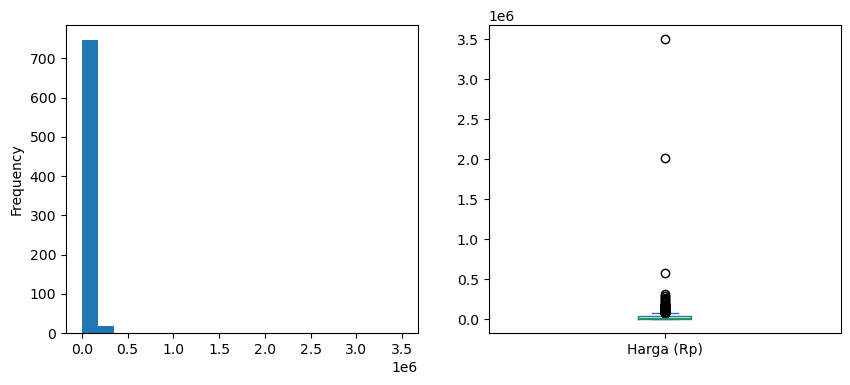

In [260]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

ds['Harga (Rp)'].plot(kind='hist',bins=20,ax=ax[0])
ds['Harga (Rp)'].plot(kind='box',ax=ax[1])

Dari nilai skewness dan grafik di atas disimpulkan bahwa terdapat banyak outliers yang membuat distribusi data menjadi tidak simetris. Karena nilai skewnessnya positif, ini artinya data harga memiliki banyak nilai yang sangat tinggi dibandingkan mayoritas nilai populasi. Ini bisa terjadi jika :

1. Terdapat produk lain selain seblak yang masuk ke dalam data sehingga menjadi outliers. Hal ini dibuktikan dengan adanya titil - titil outliers diluar upper bond pada grafik box plot
2. Beberapa produsen memang menjual dengan harga yang cukup ekstrim dibandingkan harga rata - rata produk. Misalkan, suatu produsen membuat produk seblak dengan topping mewah yang diimpor dari negara lain. Hal - hal seperti ini tentu dapat membuat harga jual seblak menjadi lebih ekstrim dibandingkan harga rata - ratanya

#### 5.2.2 Menghitung Nilai Skewness Jumlah Barang Terjual

In [261]:
# Menghitung skewness jumlah produk terjual
skew_terjual = ds['Jumlah Terjual'].skew()
print(f'Skewness jumlah produk terjual = {round(skew_terjual,4)}')

Skewness jumlah produk terjual = 3.8046


In [262]:
ds['Jumlah Terjual'].value_counts().head()

Jumlah Terjual
100    89
1      63
0      59
2      51
4      44
Name: count, dtype: int64

<Axes: >

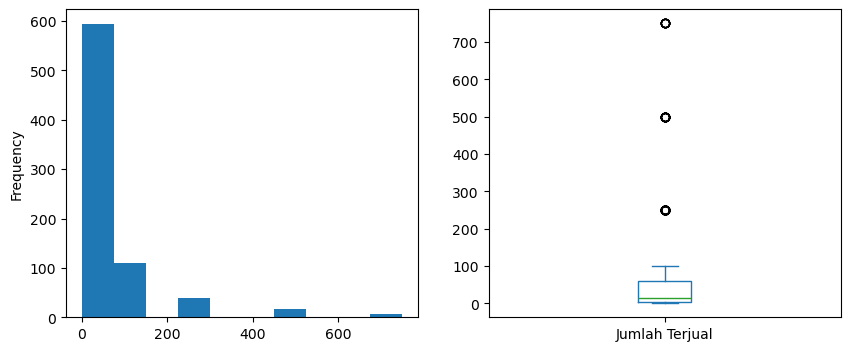

In [263]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

ds['Jumlah Terjual'].plot(kind='hist',bins=10,ax=ax[0])
ds['Jumlah Terjual'].plot(kind='box',ax=ax[1])

Nilai skewness jumlah produk terjual juga lebih besar dari +1 yang artinya terdapat beberapa produk yang terjual dengan jumlah yang sangat banyak tetapi frekuensinya kemunculannya sedikit atau hanya sedikit produk yang mencapai penjualan sebesar itu. Ini artinya terdapat produsen dengan jumlah kapasitas produksi yang besar dan brand produknya sudah cukup terkenal di kalangan masyarakat. Dari nilai skewness dan grafik histogram dapat disimpulkan jika distribusi data bertipe right skewed. Dari grafik box dapat diketahui jika data Jumlah Terjual memiliki sejumlah outliers yang membuat distribusi data menjadi tidak normal

#### 5.2.3 Menghitung Nilai Skewness Rating

In [264]:
# Menghitung skewness rating
skew_rating = ds['Rating'].skew()
print(f'Skewness rating = {round(skew_rating,4)}')

Skewness rating = -2.4714


<Axes: >

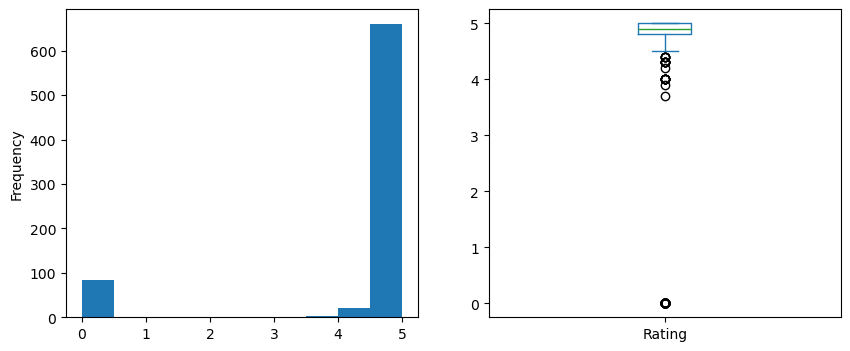

In [265]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

ds['Rating'].plot(kind='hist',bins=10,ax=ax[0])
ds['Rating'].plot(kind='box',ax=ax[1])

Dari nilai dan grafik di atas dapat disimpulkan bahwa beberapa produk yang dijual memiliki nilai rating yang rendah atau bahkan belum ada rating sama sekali (0) karena distribusi datanya yang bertipe left skewed. Sedangkan nilai rating tertinggi memiliki frekuensi kemunculan yang jauh lebih besar. Dari grafik box dapat diketahui jika data Rating memiliki sejumlah outliers yang membuat distribusi data menjadi tidak normal

### 5.3 Menghitung nilai kurtosis

Sama seperti tes skewness, kurtosis dapat menunjukan banyak tidaknya nilai ekstrim suatu data. Nilai kurtosis yang melebihi satu (Leptokurtic) memiliki arti bahwa suatu data memiliki nilai ekstrim. Nilai kurtosis 0 (Mesokurtic) memiliki arti suatu data tidak memiliki banyak nilai ekstrim. Nilai kurtosis kurang dari 0 (Platykurtic) memiliki arti bahwa data memiliki nilai ekstrim yang sangat sedikit 

#### 5.3.1 Menghitung nilai kurtosis harga

In [266]:
# Menghitung kurtosis harga jual
kurt_harga = ds['Harga (Rp)'].kurtosis()
print(f'Kurtosis harga jual = {round(kurt_harga,4)}')

Kurtosis harga jual = 391.8381


Hasil di atas mengindikasikan bahwa pada kolom harga terdapat banyak sekali nilai outliers

#### 5.3.2 Menghitung nilai kurtosis jumlah terjual

In [267]:
# Menghitung kurtosis jumlah produk terjual
kurt_terjual = ds['Jumlah Terjual'].kurtosis()
print(f'Kurtosis jumlah produk terjual = {round(kurt_terjual,4)}')

Kurtosis jumlah produk terjual = 16.7236


Hasil di atas menunjukan bahwa pada kolom jumlah terjual terdapat banyak sekali outliers atau jumlah produk terjual yang ekstrim dengan frekuensi kemunculan sedikit 

#### 5.3.3 Menghitung nilai kurtosis rating

In [268]:
# Menghitung kurtosis rating
kurt_rating = ds['Rating'].kurtosis()
print(f'Kurtosis rating = {round(kurt_rating,4)}')

Kurtosis rating = 4.2192


Nilai di atas menunjukan bahwa pada kolom rating terdapat nilai rating yang ekstrim. Dalam konteks rating, nilai ekstrimnya berbeda dengan kolom harga dan jumlah produk terjual karena pada kolom rating, nilai ekstrimnya adalah nilai dengan rating rendah atau bahkan tidak memiliki rating

### 5.5 Mencari mitra bisnis atau produsen yang sesuai

Seperti yang kita ketahui dari analisa central tendensi, skewness, dan kurtosis, data pada kolom harga produk, jumlah produk yang terjual, dan rating memiliki outliers dengan nilai yang cukup ekstrim sehingga distribusi datanya tidak normal (right skewed). Namun ketidak normalan distribusi data tersebut kita dapat mengambil insight :

1. Terdapat produsen seblak yang memiliki jumlah penjualan yang sangat tinggi di atas rata - rata
2. Terdapat produsen seblak dengan penjualan tinggi dan rating di atas atau sama dengan nilai rating rata - rata
3. Terdapat terdapat produsen seblak dengan penjualan tinggi, rating di atas rata - rata, namun dengan harga di bawah harga rata - rata

Karakteristik produsen tersebut akan kita kategorikan sebagai calon mitra bisnis potensial

In [269]:
ds.loc[((ds['Harga (Rp)'] <= ds['Harga (Rp)'].mean()) & (ds['Jumlah Terjual'] > ds['Jumlah Terjual'].mean())) & (ds['Rating'] >= ds['Rating'].mean())].sort_values(by='Jumlah Terjual',ascending=False)

,Nama Penjual,Nama Produk,Harga (Rp),Lokasi Penjual,Jumlah Terjual,Rating
27,Seblak Mang Muss,SEBLAK INSTAN MANG MUSS - LEVEL 10,13999,Tasikmalaya,750,4.9
3,ivy's-kitchen,PROMO !!!! Seblak Instan Beli 20 free 1 Murah ...,4280,Tangerang,750,4.7
5,GK_Snack,KERUPUK MENTAH SERBA 5000 BAHAN SEBLAK,6000,Bandung,750,4.9
88,Utama.Snack,Kerupuk Seblak Pedas 200gr - mawar,13500,Surabaya,750,4.9
696,Lakoca Official Shop,Latagor Batagor Instan Original - Tinggal Sedu...,16618,Cimahi,750,4.8
...,...,...,...,...,...,...
350,NeoStoreYogyakarta,snack kerupuk seblak pedas - kerupuk seblak pe...,11000,Yogyakarta,60,5.0
75,Kairashop_id,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,3800,Surabaya,60,4.9
253,Hosana Snack,Krupuk Stik Seblak /pedas 1kg,12000,Bogor,60,4.9
742,Hanui Food,Seblak Frozen,16000,Jakarta,60,5.0


Dari data di atas terlihat bahwa penjual 'ivy's-kitchen' memiliki harga seblak yang sangat murah dibandingkan harga rata - ratanya (Rp. 39.358) dengan jumlah produk terjual dan rating yang sangat tinggi (Rata - rata produk terjual adalah 56 pcs dan rata - rata nilai rating adalah 4.37). Dari segi lokasi pun 'ivy's-kitchen' terbilang tidak terlalu jauh dari Bekasi. Oleh karena itu, 'ivy's-kitchen' adalah mitra bisnis potensial.

Namun sebelum itu, saya ingin memastikan berapa pendapatan kotor yang akan saya dapatkan jika saya ingin menjual seblak, mengingat target saya adalah balik modal dalam 1 bulan kedepan (Rp 1.2 juta). Oleh karena itu, saya harus melakukan perhitungan potensi pendapatan minimum serta maksimum dalam sebulan. Dalam hal ini, pendapatan minimum saya harus sebesar Rp. 1.2 juta

### 5.6 Apakah potensi pendapatan sesuai dengan target pendapatan yang ingin dicapai ?


Pada tahap ini saya ingin memastikan berapa pendapatan kotor yang akan saya dapatkan jika saya ingin menjual seblak, mengingat target saya adalah dapat balik modal dalam 1 bulan kedepan (Rp 2 juta). Oleh karena itu, saya harus melakukan perhitungan potensi pendapatan minimum serta maksimum dalam sebulan. Dalam hal ini, pendapatan minimum saya harus sebesar Rp. 2 juta untuk mengantisipasi jika tidak semua produk terjual.

Di sini saya akan memakai asumsi bahwa data jumlah terjual adalah data yang dihasilkan per bulannya. Untuk mendapatkan perkiraan pendapatan perbulan maka saya harus membuat kolom baru yang dapat menghasilkan nilai pendapatan perbulan dari tiap penjual. Dalam konteks ini, pendapatan per bulan adalah hasil perkalian dari harga produk dengan jumlah terjual.


In [271]:
# Membuat kolom pendapatan per bulan
ds['Pendapatan perbulan'] = ds['Harga (Rp)']*ds['Jumlah Terjual']
ds

,Nama Penjual,Nama Produk,Harga (Rp),Lokasi Penjual,Jumlah Terjual,Rating,Pendapatan perbulan
0,Sajodo Snack & Food,SEBLAK INSTAN SAJODO SNACK,22500,Tasikmalaya,100,4.8,2250000
1,Kylafood Jakarta,Kylafood Seblak Rempah Autentik,14000,Jakarta,250,5.0,3500000
2,hikmah berkah jaya,seblak instant sajodo snak,19000,Jakarta,1,4.8,19000
3,ivy's-kitchen,PROMO !!!! Seblak Instan Beli 20 free 1 Murah ...,4280,Tangerang,750,4.7,3210000
4,Sajodo Snack & Food,[ Buy 5 Get 5 ] Special Bedug Package (Baso Ac...,150000,Tasikmalaya,7,4.8,1050000
...,...,...,...,...,...,...,...
762,ningsih778,Terlaris! 1KG Kerupuk Seblak Kang Asep Spesial...,66000,Jakarta,0,0.0,0
763,Mega_Snack_095,seblak bantat krupuk jaat beton 100 grm daun j...,4400,Cimahi,12,5.0,52800
764,fajarfatihacollections,V♪NN KERUPUK BAWANG MENTAH -+5KG UNTUK SEBLAK ...,103000,Tangerang,3,5.0,309000
765,Rebina Frozen Mart,CIKEMAM Seblak Seuhah,16500,Bandung,4,0.0,66000


In [272]:
# Menghitung rata - rata pendapatan kotor
print(f'Rata - rata pendapatan kotor = Rp. {ds["Pendapatan perbulan"].mean()}')

Rata - rata pendapatan kotor = Rp. 1402660.7574967404


Pada perhitungan potensi pendapatan minimum dan maksimum, kita menggunakan confidence interval sebesar 95 %. Artinya, kita yakin bahwa terdapat 95 % kemungkinan dari seluruh populasi jika nilai pendapatan rata - rata kita akan berada pada rentang pendapatan minimum dan maksimum tertentu

In [273]:
std = ds['Pendapatan perbulan'].std()
N = len(ds)
low, up = stats.norm.interval(0.95,loc=ds['Pendapatan perbulan'].mean(),scale=std/np.sqrt(N))
print('Potensi pendapatan minimum = Rp.',low)
print('Potensi pendapatan maksimum = Rp.',up)

Potensi pendapatan minimum = Rp. 1039264.4368914464
Potensi pendapatan maksimum = Rp. 1766057.0781020345


Dari data di atas, dapat disimpulkan bahwa terdapat 95% kemungkinan pendapatan rata - rata saya akan berada pada rentang Rp. 1.039.264 - Rp. 1.766.057 atau dengan kata lain potensi pendapatan maksimum saya dalam menjual seblak adalah sebesar  Rp. 1.766.057 dan potensi pendapatan minimum saya adalah sebesar  Rp. 1.039.264. Nilai minimum dan maksimum tersebut tidak memenuhi syarat pendapatan minimum yang saya butuhkan agar dapat balik modal dalam 1 bulan. Artinya, target pendapatan saya tidak akan tercapai jika saya tetap menargetkan pendapatan minimum setelah 1 bulan berjualan sebesar Rp. 2 juta.

### 5.5 Pengaruh lokasi terhadap harga produk

Pada tahap ini, saya akan memastikan apakah lokasi penjual memiliki pengaruh terhadap harga produk dengan melakukan tes uji hipotesis. Sebagai contoh, jika suatu saat terjadi inflansi yang cukup tinggi pada suatu daerah, maka kemungkinan besar harga produk yang dijual oleh produsen di daerah tersebut akan ikut naik. Untuk mengatasi hal tersebut maka diperlukan mitra bisnis cadangan yang dekat dengan sumber bahan bahan baku seblak agar jika terjadi inflasi, diharapkan produsen seblak tidak menaikan produknya secara berlebihan atau bahkan diharapkan tidak menaikan harga produknya sama sekali. 

Pengujian hipotesis yang digunakan adalah pengujian T-test two sided test dengan 2 sample. Berikut hipotesis yang diajukan :

Hipotesis 0 : Tidak terdapat perbedaan harga seblak antara lokasi Jabodetabek dan di luar Jabodetabek -> μJabodetabek == μnJabodetabek

Hipotesis 1 : Terdapat perbedaan harga seblak antara lokasi Jabodetabek dan di luar Jabodetabek -> μJabodetabek != μnJabodetabek

Pada hipotesis di atas, saya ingin mengetahui apakah ada perbedaan harga seblak yang dijual di tokopedia antara penjual yang berlokasi di Jabodetabek dengan penjual yang berlokasi di luar daerah tersebut. Mengingat target penjual yang akan saya jadikan mitra bisnis (ivy's-kitchen) berasal dari tangerang maka yang akan saya bandingkan adalah penjual yang berada di luar kawasan Jabodetabek 

In [274]:
# Menghitung jumlah penjual yang berasal dari Jabodetabek
len(ds.loc[ds['Lokasi Penjual'].isin(['Jakarta', 'Bogor', 'Depok','Tangerang','Bekasi'])])

393

In [275]:
# Menghitung jumlah penjual yang berasal dari luar Jabodetabek
len(ds.loc[~ds['Lokasi Penjual'].isin(['Jakarta', 'Bogor', 'Depok','Tangerang','Bekasi'])])

374

In [276]:
# Membuat variable list untuk data harga seblak dari penjual yang berlokasi di Jabodetabek
harga_jbdtb = ds.loc[ds['Lokasi Penjual'].isin(['Jakarta', 'Bogor', 'Depok','Tangerang','Bekasi'])]['Harga (Rp)']

# Membuat variable list untuk data harga seblak dari penjual yang berlokasi di luar Jabodetabek
harga_njbdtb = ds.loc[~ds['Lokasi Penjual'].isin(['Jakarta', 'Bogor', 'Depok','Tangerang','Bekasi'])]['Harga (Rp)']

In [277]:
# Harga rata - rata produk dari penjual yang berlokasi di Jabodetabek
print(f'Harga rata - rata seblak dari penjual Jabodetabek = {harga_jbdtb.mean()}')

# Harga rata - rata produk dari penjual yang berlokasi di Jabodetabek
print(f'Harga rata - rata seblak dari penjual non Jabodetabek = {harga_njbdtb.mean()}')

Harga rata - rata seblak dari penjual Jabodetabek = 51346.02290076336
Harga rata - rata seblak dari penjual non Jabodetabek = 26761.38770053476


In [278]:
# Mencari nilai P-Value
critical_value = 0.05
t,p = stats.ttest_rel(harga_jbdtb.sample(30),harga_njbdtb.sample(30)) 
print('P-Value:',p)

if p > critical_value :
    print('HO diterima, H1 ditolak : Tidak ada perbedaan signifikan antara seblak yang dijual oleh produsen asal Jabodetabek dengan produsen di luar Jabodetabek')
else :
    print('H1 diterima, H0 ditolak : Tidak ada perbedaan signifikan antara seblak yang dijual oleh produsen asal Jabodetabek dengan produsen di luar Jabodetabek')

P-Value: 0.2549179583666028
HO diterima, H1 ditolak : Tidak ada perbedaan signifikan antara seblak yang dijual oleh produsen asal Jabodetabek dengan produsen di luar Jabodetabek


Jika nilai confidence level adalah 95% dan critical values adalah 5% atau 0.05, maka dapat dimpulkan bahwa tidak ada perbedaan signifikan antara harga rata-rata produk seblak yang dijual oleh penjual asal Jabodetabek dengan produk seblak yang dijual oleh penjual yang asalnya di luar Jabodetabek karena nilai P-value > critical value, atau :

 HO diterima 
 
 H1 ditolak

### 5.4 Pengaruh harga seblak dengan terhadap penjualan produk

Setelah tahu siapa mitra bisnis potensial, berapa potensi pendapatan minimum, dan pengaruh lokasi terhadap harga produk, sekarang saya akan mencoba melakukan analisis hubungan antara harga seblak dengan jumlah penjualan produk. Dengan kata lain, analisis ini juga menjawab pertanyaan mengenai apakah konsumen seblak lebih menyukai seblak dengan harga yang rendah. Analisis ini penting untuk menjelaskan mengapa 'ivy's-kitchen' memiliki jumlah penjualan dan nilai rating di atas rata - rata, karena produk seblak yang dijual oleh 'ivy's-kitchen' lebih murah dibandingkan harga rata-rata.

Untuk mengetahui korelasi antara harga seblak dengan jumlah penjualan, maka saya akan menggunakan analisis korelasi Spearman. Analisis korelasi spearman digunakan dengan alasan :
1. Data yang dipakai bersifat numerik
2. Data yang dipakai tidak terdistribusi secara normal atau dengan kata lain skewed 

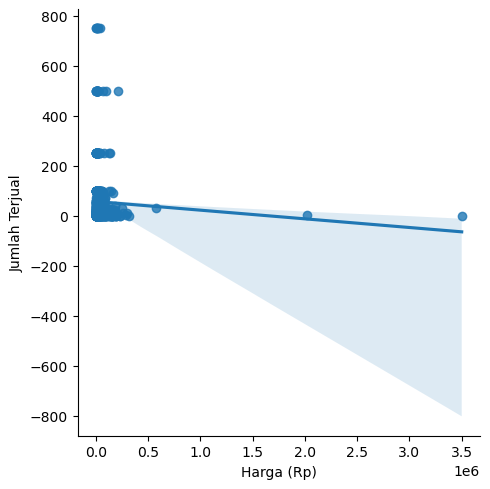

In [279]:
# Membuat plot Harga vs Jumlah Terjual
sns.lmplot(data=ds,x='Harga (Rp)', y='Jumlah Terjual')

In [280]:
corr_rho, pval_s = stats.spearmanr(ds['Harga (Rp)'], ds['Jumlah Terjual'])
print(f"rho-correlation = {corr_rho:.2f}, p-value = {pval_s}")


rho-correlation = -0.10, p-value = 0.007880901270158964


Di sini kita menggunakan ciritcal value sebesar 0.05. Karena nilai p-val lebih kecil dibandingkan critical value (p-val < c-val), maka kita dapat menyimpulkan bahwa terdapat hubungan antara harga produk dengan jumlah penjualan atau dapat dikatakan suka tidak sukanya konsumen seblak terhadap suatu produk seblak, dapat dipengaruhi dengan harga produk seblak itu sendiri.

Berarti salah satu faktor mengapa penjualan ivy's-kitchen lebih besar dibandingkan penjualan rata - rata kemungkinan besar kemungkinan disebabkan karena harga produk ivy's-kitchen (Rp 4.280) yang lebih murah dibandingkan harga rata - rata (Rp 39.358)

# 6. Kesimpulan

1. Dengan harga rata - rata produk Rp. 39.358 dan harga produk calon mitra bisnis potensial sebesar Rp 4.280, maka potensi pendapatan kotor minimal saya adalah sebesar Rp. 1.039.264 dan potensi pendapatan kotor maksimal saya adalah sebesar Rp. 1.766.057. Dengan potensi harga minimal sebesar itu, maka kemungkinan besar saya tidak akan dapat mencapai target pendapatan kotor sebesar Rp 2 juta dalam 1 bulan setelah penjualan. Agar tetap bisa berjualan seblak, setidaknya saya harus menurunkan target pendapatan kotor setelah berjualan seblak selama 1 bulan sebesar Rp. 1.039.264. Nilai tersebut bukanlah nilai yang pasti akan didapatkan mengingat kemungkinannya sebesar 95% (sesuai confidence level)

2. Ivy's-kitchen menjadi calon mitra bisnis potensial untuk menjalankan usaha dropshipper. Hal ini dikarenakan beberapa hal sebagai berikut :

    -Harga produk yang dijual ivy's-kitchen lebih murah dibandingkan harga rata-rata. Harga jual ivy's-kitchen sebesar Rp 4.280 dan harga jual rata - rata sebesar Rp. 39.358 sehingga saya masih memiliki margin untuk menaikan harga produk demi mendapatkan keuntungan 

    -Jumlah produk terjual telah dijual oleh ivy's-kitchen (750 pcs) lebih banyak dibandingkan jumlah terjual rata-rata populasi (56 pcs). Hal ini mengindikasikan bahwa produk ivy's-kitchen sudah cukup populer dan sudah diketahui oleh banyak konsumen seblak pengguna tokopedia. 
    
    Berdasarkan hasil uji korelasi spearman mengenai korelasi antara harga produk dengan jumlah penjualan, didapatkan kesimpulan bahwa semakin murah harga produk seblak maka kemungkinan semakin banyak yang membeli produk seblak tersebut, atau dengan kata lain harga juga mempengaruhi minat masyara terhadap produk seblak. Harga murah yang dijual ivy's-kitchen menjadi keuntungan buat saya karena harga produk yang akan saya jual (sudah dinaikan harganya) memiliki potensi berada di bawah harga rata - rata

    -Nilai rating produk ivy's-kitchen (4.7) lebih besar dibandingkan nilai rating rata - rata populasi (4.37). Hal ini mengindikasikan bahwa produk yang dijual oelh ivy's-kitchen banyak disukai oleh masyarakat

3. Berdasarkan hasil analisa central tendency dan skewness, maka dapat diambil kesimpulan bahwa data tidak terdistribusi secara normal pada kolom harga, jumlah terjual, dan rating. Hal ini menunjukan banyaknya variasi nilai pada masing - masing kolom tersebut dan adanya keberadaan nilai - nilai ekstrim. Nilai - nilai ekstrim pada masing - masing kolom dapat memiliki arti :
    - Kolom harga (right skewed) : 
    Terdapat produk yang harganya sangat tinggi dan hanya terjual sedikit, mengindikasikan bahwa produk yang harganya murah lebih dipilih oleh masyarakat. Hal ini ditegaskan juga oleh hasil pengujian korelasi spearman. Berarti jika saya ingin berjualan seblak, harga yang saya berikan tidak boleh terlalu mahal higga di atas rata - rata harga produk

    - Kolom jumlah terjual (right skewed) : 
    Terdapat produk seblak yang baru sedikit total penjualannya atau terdapat produk seblak yang belum dibeli sama sekali

    - Kolom rating (left skewed):
    Terdapat beberapa produk yang belum memiliki rating atau atau beberapa produk yang memiliki rating rendah. Karena mayoritas nilai berkumpul pada bagian kanan dan menurun pada bagian kiri, ini artinya mayoritas produk memiliki ratting yang yang cukup tinggi. Hal ini juga bisa menyiratkan bahwa produk seblak (apapun itu) disukai oleh mayoritas pembeli

    